In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
dataset = pd.read_csv("C:/Users/91745/Downloads/archive_creditcard/creditcard.csv")

In [4]:
dataset.head(25)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [31]:
dataset.tail(25)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284782,172767.0,-0.268061,2.540315,-1.400915,4.846661,0.639105,0.186479,-0.045911,0.936448,-2.419986,...,-0.263889,-0.857904,0.235172,-0.681794,-0.668894,0.044657,-0.066751,-0.072447,12.82,0
284783,172768.0,-1.796092,1.929178,-2.828417,-1.689844,2.199572,3.123732,-0.270714,1.657495,0.465804,...,0.271170,1.145750,0.084783,0.721269,-0.529906,-0.240117,0.129126,-0.080620,11.46,0
284784,172768.0,-0.669662,0.923769,-1.543167,-1.560729,2.833960,3.240843,0.181576,1.282746,-0.893890,...,0.183856,0.202670,-0.373023,0.651122,1.073823,0.844590,-0.286676,-0.187719,40.00,0
284785,172768.0,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,...,-0.266113,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0
284786,172768.0,-2.076175,2.142238,-2.522704,-1.888063,1.982785,3.732950,-1.217430,-0.536644,0.272867,...,2.016666,-1.588269,0.588482,0.632444,-0.201064,0.199251,0.438657,0.172923,8.95,0
284787,172769.0,-1.029719,-1.110670,-0.636179,-0.840816,2.424360,-2.956733,0.283610,-0.332656,-0.247488,...,0.353722,0.488487,0.293632,0.107812,-0.935586,1.138216,0.025271,0.255347,9.99,0
284788,172770.0,2.007418,-0.280235,-0.208113,0.335261,-0.715798,-0.751373,-0.458972,-0.140140,0.959971,...,-0.208260,-0.430347,0.416765,0.064819,-0.608337,0.268436,-0.028069,-0.041367,3.99,0
284789,172770.0,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,...,0.851800,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,60.50,0
284790,172771.0,-0.515513,0.971950,-1.014580,-0.677037,0.912430,-0.316187,0.396137,0.532364,-0.224606,...,-0.280302,-0.849919,0.300245,0.000607,-0.376379,0.128660,-0.015205,-0.021486,9.81,0
284791,172774.0,-0.863506,0.874701,0.420358,-0.530365,0.356561,-1.046238,0.757051,0.230473,-0.506856,...,-0.108846,-0.480820,-0.074513,-0.003988,-0.113149,0.280378,-0.077310,0.023079,20.32,0


In [5]:
dataset.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
#Dummy
fraud_credit_data = dataset[dataset['Class']==0]
nonfraud_credit_data = dataset[dataset['Class']==1]

print("Shape of fraud:",fraud_credit_data.shape)
print("Shape of nonfraud:",nonfraud_credit_data.shape)

Shape of fraud: (284315, 31)
Shape of nonfraud: (492, 31)


In [8]:
nonfraud_credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [9]:
fraud_sample = fraud_credit_data.sample(n=500)
fraud_sample.shape


(500, 31)

In [10]:
new_dataset=pd.concat([fraud_sample,nonfraud_credit_data],axis=0)
new_dataset.shape

(992, 31)

In [13]:
X=new_dataset.drop(columns=['Class'],axis=1)
Y=new_dataset['Class']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)
X_train.shape

(793, 30)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [48]:
model_list=[LogisticRegression(max_iter=1000000),LinearSVC(),RandomForestClassifier(),MLPClassifier(),GaussianNB(),DecisionTreeClassifier()]

def classifier_model():

  for model in model_list:
    model.fit(X_train,Y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    acc_score_train = accuracy_score(Y_train,y_train_pred)
    acc_score_test = accuracy_score(Y_test,y_test_pred)
    print("Accuracy train :",model," is: ",round(acc_score_train *100,2)," %")
    print("Accuracy test :",model," is: ",round(acc_score_test*100,2)," %")
    print("**************")

In [1]:
classifier_model()

NameError: name 'classifier_model' is not defined

In [21]:
model_list=[LogisticRegression(max_iter=1000000),LinearSVC(),RandomForestClassifier(),MLPClassifier(),GaussianNB(),DecisionTreeClassifier()]

def classifier_model_with_cv():

  for model in model_list:
    cv_score = cross_val_score(model,X,Y,cv=5)
    mean_score=sum(cv_score)/len(cv_score)
    mean_score=mean_score*100
    mean_score=round(mean_score,2)
    
  
    print("Accuracy test :",model," is: ",mean_score)
    print("*******")

In [49]:
classifier_model_with_cv()

Accuracy test : LogisticRegression(max_iter=1000000)  is:  92.44
*******


C:\Users\91745\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\91745\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91745\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\91745\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91745\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` expl

Accuracy test : LinearSVC()  is:  56.03
*******
Accuracy test : RandomForestClassifier()  is:  92.74
*******
Accuracy test : MLPClassifier()  is:  52.72
*******
Accuracy test : GaussianNB()  is:  85.38
*******
Accuracy test : DecisionTreeClassifier()  is:  89.62
*******


In [23]:
#hyperparamter tuning
parameters={
    'n_estimators':[10,50,100],
    'criterion':["gini", "entropy", "log_loss"]

}
modelX=RandomForestClassifier()
classifier=  GridSearchCV(modelX,parameters,cv=5)
classifier.fit(X,Y)
print(classifier.cv_results_)
print(classifier.best_score_)

{'mean_fit_time': array([0.1581347 , 0.84624338, 1.64474115, 0.15918627, 0.77198186,
       1.63458595, 0.16082845, 0.77074652, 1.54187608]), 'std_fit_time': array([0.01821821, 0.04110863, 0.06166031, 0.00618273, 0.03134182,
       0.1051349 , 0.0117498 , 0.04157818, 0.0577811 ]), 'mean_score_time': array([0.00765905, 0.01645141, 0.02974553, 0.00766706, 0.01990886,
       0.01860461, 0.00336461, 0.01752481, 0.03382425]), 'std_score_time': array([0.00699182, 0.00115396, 0.00534613, 0.00110468, 0.00401078,
       0.00512449, 0.00412122, 0.00380666, 0.00372718]), 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                   'entropy', 'log_loss', 'log_loss', 'log_loss'],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[10, 50, 100, 10, 50, 100, 10, 50, 100],
             mask=[False, False, False, False, Fa

In [ ]:
# Final classifier selected - RandomFoerest Classifier - It gave 93.85% accuracy on test

In [25]:
print(classifier.best_params_)

{'criterion': 'gini', 'n_estimators': 50}


In [60]:
final_model=RandomForestClassifier(criterion="gini",n_estimators=50)
final_model.fit(X_train,Y_train)
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
acc_score_train = accuracy_score(Y_train,y_train_pred)
acc_score_test = accuracy_score(Y_test,y_test_pred)
print("Accuracy train :",final_model," is: ",round(acc_score_train *100,2)," %")
print("Accuracy test :",final_model," is: ",round(acc_score_test*100,2)," %")
print("**************")

Accuracy train : RandomForestClassifier(n_estimators=50)  is:  99.87  %
Accuracy test : RandomForestClassifier(n_estimators=50)  is:  93.47  %
**************


In [80]:
input_data2=(1,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459424895,0.066083685268831,0.717292731410831,-0.165945922763554,2.34586494901581,-2.89008319444231,1.10996937869599,-0.121359313195888,-2.26185709530414,0.524979725224404,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,)

In [70]:
# 
# input_data = (406,-2.312226542,1.951992011,-1.609850732,3.997905588,-0.522187865,-1.426545319,-2.537387306,1.391657248,-2.770089277,-2.772272145,3.202033207,-2.899907388,-0.595221881,-4.289253782,0.38972412,-1.14074718,-2.830055675,-0.016822468,0.416955705,0.126910559,0.517232371,-0.035049369,-0.465211076,0.32019819,0.044519167,0.177839798,0.261145003,-0.143275875,0)

In [81]:
input_array = np.asarray(input_data2)
print(input_array)
input_array=input_array.reshape(1,-1)
print(input_array)

[ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00  1.77320934e+00
  3.79779593e-01 -5.03198133e-01  1.80049938e+00  7.91460956e-01
  2.47675787e-01 -1.51465432e+00  2.07642865e-01  6.24501459e-01
  6.60836853e-02  7.17292731e-01 -1.65945923e-01  2.34586495e+00
 -2.89008319e+00  1.10996938e+00 -1.21359313e-01 -2.26185710e+00
  5.24979725e-01  2.47998153e-01  7.71679402e-01  9.09412262e-01
 -6.89280956e-01 -3.27641834e-01 -1.39096572e-01 -5.53527940e-02
 -5.97518406e-02  3.78660000e+02]
[[ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00  1.77320934e+00
   3.79779593e-01 -5.03198133e-01  1.80049938e+00  7.91460956e-01
   2.47675787e-01 -1.51465432e+00  2.07642865e-01  6.24501459e-01
   6.60836853e-02  7.17292731e-01 -1.65945923e-01  2.34586495e+00
  -2.89008319e+00  1.10996938e+00 -1.21359313e-01 -2.26185710e+00
   5.24979725e-01  2.47998153e-01  7.71679402e-01  9.09412262e-01
  -6.89280956e-01 -3.27641834e-01 -1.39096572e-01 -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]]


In [84]:
# )
input_df=pd.DataFrame(input_array.reshape(1,-1))
# print(input_df)
y_predd = final_model.predict(input_df)
# print(y_predd)
if(y_predd==1):
    print("It is Fraud X")
else:
    print("It is Safe!!")

It is Safe!!


C:\Users\91745\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [56]:
import tensorflow
import keras
from keras import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,Flatten
import matplotlib.pyplot as plt

In [70]:
model=Sequential()

model.add(Dense(16,activation='relu',input_shape=(30,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 16)                496       
                                                                 
 dense_49 (Dense)            (None, 8)                 136       
                                                                 
 dense_50 (Dense)            (None, 8)                 72        
                                                                 
 dense_51 (Dense)            (None, 8)                 72        
                                                                 
 dense_52 (Dense)            (None, 1)                 9         
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
history=model.fit(X_train,Y_train, validation_split=0.1,epochs=350)

Epoch 1/350
23/23 [==============================] - 2s 20ms/step - loss: 0.6313 - accuracy: 0.7574 - val_loss: 0.6096 - val_accuracy: 0.7625
Epoch 2/350
23/23 [==============================] - 0s 6ms/step - loss: 0.5499 - accuracy: 0.7938 - val_loss: 0.5429 - val_accuracy: 0.7625
Epoch 3/350
23/23 [==============================] - 0s 6ms/step - loss: 0.4604 - accuracy: 0.8485 - val_loss: 0.4563 - val_accuracy: 0.8250
Epoch 4/350
23/23 [==============================] - 0s 6ms/step - loss: 0.3711 - accuracy: 0.8878 - val_loss: 0.3944 - val_accuracy: 0.8375
Epoch 5/350
23/23 [==============================] - 0s 6ms/step - loss: 0.3098 - accuracy: 0.9018 - val_loss: 0.3530 - val_accuracy: 0.8375
Epoch 6/350
23/23 [==============================] - 0s 6ms/step - loss: 0.2678 - accuracy: 0.9102 - val_loss: 0.3272 - val_accuracy: 0.8500
Epoch 7/350
23/23 [==============================] - 0s 6ms/step - loss: 0.2367 - accuracy: 0.9187 - val_loss: 0.2976 - val_accuracy: 0.8750
Epoch 8/350


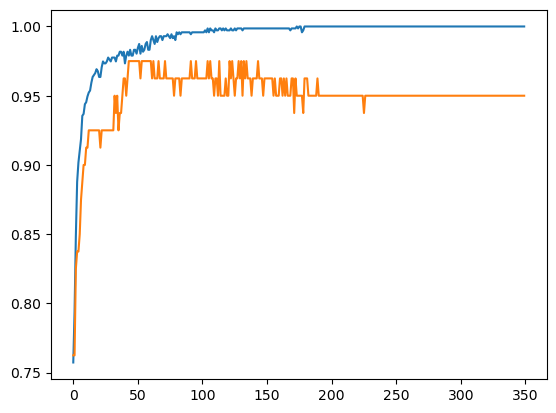

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [74]:
loss,accuracy=model.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 5ms/step - loss: 1.1660 - accuracy: 0.9196


In [75]:
print(accuracy)

0.9195979833602905
